### Question 1:

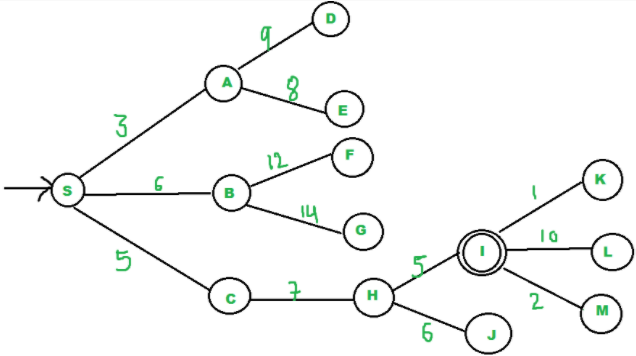

Run Greedy Search and also calculate hueristic for each node.

In [1]:
# Implement Best First Serach with heuristic function for hueristic calculation.
from queue import PriorityQueue
v = 14
graph = [[] for i in range(v)]
def best_first_search(source, target, n):
    visited = [0] * n
    visited = True
    pq = PriorityQueue()
    pq.put((0, source))
    while pq.empty() == False:
        u = pq.get()[1]
        print(u, end=" ")
        if u == target:
            break
 
        for v, c in graph[u]:
            if visited[v] == False:
                visited[v] = True
                pq.put((c, v))
    print()
def addedge(x, y, cost):
    graph[x].append((y, cost))
    graph[y].append((x, cost))
 
 
addedge('S', 'A', 3)
addedge('S', 'B', 6)
addedge('S', 'C', 5)
addedge('A', 'D', 9)
addedge('A', 'E', 8)
addedge('B', 'F', 12)
addedge('B', 'G', 14)
addedge('C', 'H', 7)
addedge('H', 'I', 5)
addedge('H', 'J', 6)
addedge('I', 'K', 1)
addedge('I', 'L', 10)
addedge('I', 'M', 2)
 
source = 'S'
target = 'I'
best_first_search(source, target, v)

TypeError: list indices must be integers or slices, not str

### Question 2:

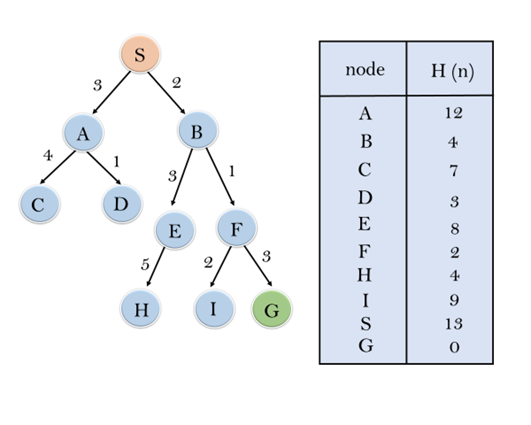

Run Greedy Search.

In [ ]:
# Implement Best First Search
from queue import PriorityQueue
v = 10
graph = [[] for i in range(v)]
def best_first_search(source, target, n):
    visited = [0] * n
    visited = True
    pq = PriorityQueue()
    pq.put((0, source))
    while pq.empty() == False:
        u = pq.get()[1]
        print(u, end=" ")
        if u == target:
            break
 
        for v, c in graph[u]:
            if visited[v] == False:
                visited[v] = True
                pq.put((c, v))
    print()
def addedge(x, y, cost):
    graph[x].append((y, cost))
    graph[y].append((x, cost))
 
 
addedge('S', 'A', 3)
addedge('S', 'B', 2)
addedge('A', 'C', 4)
addedge('A', 'D', 1)
addedge('B', 'E', 3)
addedge('B', 'F', 1)
addedge('E', 'H', 5)
addedge('F', 'I', 2)
addedge('F', 'G', 3)
 
source = 'S'
target = 'G'
best_first_search(source, target, v)

### Question 3:

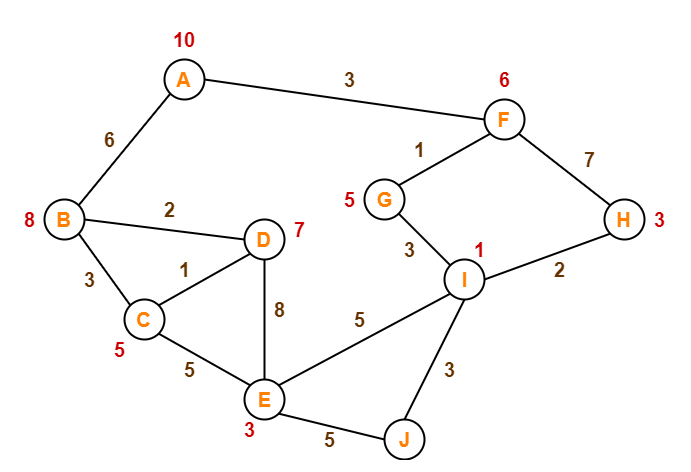

Run A* Search. Before search you have to find the hueristic of the each node.

In [4]:
#Implement A* with heuristic function for hueristic calculation.
class Graph:
    def __init__(self, graph_dict=None, directed=True):
        self.graph_dict = graph_dict or {}
        self.directed = directed
        if not directed:
            self.make_undirected()

    def make_undirected(self):
        for a in list(self.graph_dict.keys()):
            for (b, dist) in self.graph_dict[a].items():
                self.graph_dict.setdefault(b, {})[a] = dist

    def connect(self, A, B, distance=1):
        self.graph_dict.setdefault(A, {})[B] = distance
        if not self.directed:
            self.graph_dict.setdefault(B, {})[A] = distance

    def get(self, a, b=None):
        links = self.graph_dict.setdefault(a, {})
        if b is None:
            return links
        else:
            return links.get(b)

    def nodes(self):
        s1 = set([k for k in self.graph_dict.keys()])
        s2 = set([k2 for v in self.graph_dict.values() for k2, v2 in v.items()])
        nodes = s1.union(s2)
        return list(nodes)

class Node:

    def __init__(self, name:str, parent:str):
        self.name = name
        self.parent = parent
        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.name == other.name

    def __lt__(self, other):
         return self.f < other.f

    def __repr__(self):
        return ('({0},{1})'.format(self.name, self.f))

def astar_search(graph, heuristics, start, end):
    
    open = []
    closed = []

    start_node = Node(start, None)
    goal_node = Node(end, None)

    open.append(start_node)
    

    while len(open) > 0:
        open.sort()
        current_node = open.pop(0)
        closed.append(current_node)
        
        if current_node == goal_node:
            path = []
            while current_node != start_node:
                path.append(current_node.name + ': ' + str(current_node.g))
                current_node = current_node.parent
            path.append(start_node.name + ': ' + str(start_node.g))
            return path[::-1]
        neighbors = graph.get(current_node.name)
        for key, value in neighbors.items():
            neighbor = Node(key, current_node)
            if(neighbor in closed):
                continue
            neighbor.g = current_node.g + graph.get(current_node.name, neighbor.name)
            neighbor.h = heuristics.get(neighbor.name)
            neighbor.f = neighbor.g + neighbor.h
            if(add_to_open(open, neighbor) == True):
                open.append(neighbor)
    return None

def add_to_open(open, neighbor):
    for node in open:
        if (neighbor == node and neighbor.f > node.f):
            return False
    return True

def main():

    graph = Graph()

    graph.connect('A', 'B', 6)
    graph.connect('A', 'F', 3)
    graph.connect('B', 'C', 3)
    graph.connect('B', 'D', 2)
    graph.connect('C', 'D', 1)
    graph.connect('C', 'E', 5)
    graph.connect('D', 'E', 8)
    graph.connect('E', 'I', 5)
    graph.connect('E', 'J', 5)
    graph.connect('F', 'G', 1)
    graph.connect('F', 'H', 7)
    graph.connect('G', 'I', 3)
    graph.connect('H', 'I', 2)
    graph.connect('I', 'J', 3)

    graph.make_undirected()

    heuristics = {}
    heuristics['A'] = 10
    heuristics['B'] = 8
    heuristics['C'] = 5
    heuristics['D'] = 7
    heuristics['E'] = 3
    heuristics['F'] = 6
    heuristics['G'] = 5
    heuristics['H'] = 3
    heuristics['I'] = 1
    heuristics['J'] = 0

    path = astar_search(graph, heuristics, 'A', 'J')
    print(path)
    print()
if __name__ == "__main__": main()

['A: 0', 'F: 3', 'G: 4', 'I: 7', 'J: 10']



### Question 4

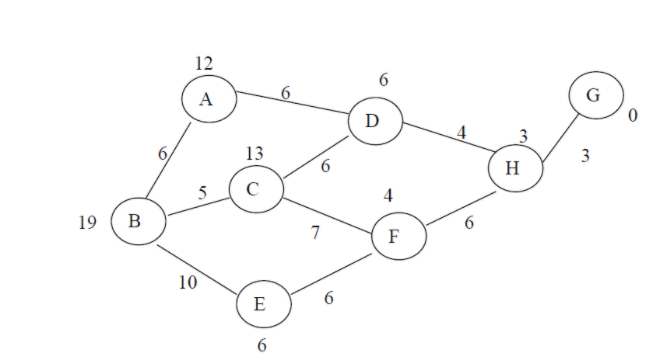

Run A* Search. Before search you have to find the hueristic of the each node.

In [5]:
#Implement A* with heuristic function for hueristic calculation.
class Graph:
    def __init__(self, graph_dict=None, directed=True):
        self.graph_dict = graph_dict or {}
        self.directed = directed
        if not directed:
            self.make_undirected()

    def make_undirected(self):
        for a in list(self.graph_dict.keys()):
            for (b, dist) in self.graph_dict[a].items():
                self.graph_dict.setdefault(b, {})[a] = dist

    def connect(self, A, B, distance=1):
        self.graph_dict.setdefault(A, {})[B] = distance
        if not self.directed:
            self.graph_dict.setdefault(B, {})[A] = distance

    def get(self, a, b=None):
        links = self.graph_dict.setdefault(a, {})
        if b is None:
            return links
        else:
            return links.get(b)

    def nodes(self):
        s1 = set([k for k in self.graph_dict.keys()])
        s2 = set([k2 for v in self.graph_dict.values() for k2, v2 in v.items()])
        nodes = s1.union(s2)
        return list(nodes)

class Node:

    def __init__(self, name:str, parent:str):
        self.name = name
        self.parent = parent
        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.name == other.name

    def __lt__(self, other):
         return self.f < other.f

    def __repr__(self):
        return ('({0},{1})'.format(self.name, self.f))

def astar_search(graph, heuristics, start, end):
    
    open = []
    closed = []

    start_node = Node(start, None)
    goal_node = Node(end, None)

    open.append(start_node)
    

    while len(open) > 0:
        open.sort()
        current_node = open.pop(0)
        closed.append(current_node)
        
        if current_node == goal_node:
            path = []
            while current_node != start_node:
                path.append(current_node.name + ': ' + str(current_node.g))
                current_node = current_node.parent
            path.append(start_node.name + ': ' + str(start_node.g))
            return path[::-1]
        neighbors = graph.get(current_node.name)
        for key, value in neighbors.items():
            neighbor = Node(key, current_node)
            if(neighbor in closed):
                continue
            neighbor.g = current_node.g + graph.get(current_node.name, neighbor.name)
            neighbor.h = heuristics.get(neighbor.name)
            neighbor.f = neighbor.g + neighbor.h
            if(add_to_open(open, neighbor) == True):
                open.append(neighbor)
    return None

def add_to_open(open, neighbor):
    for node in open:
        if (neighbor == node and neighbor.f > node.f):
            return False
    return True

def main():

    graph = Graph()

    graph.connect('A', 'B', 6)
    graph.connect('A', 'D', 6)
    graph.connect('B', 'C', 5)
    graph.connect('B', 'E', 10)
    graph.connect('C', 'D', 6)
    graph.connect('C', 'F', 7)
    graph.connect('D', 'H', 4)
    graph.connect('E', 'F', 6)
    graph.connect('F', 'H', 6)
    graph.connect('H', 'G', 3)

    graph.make_undirected()

    heuristics = {}
    heuristics['A'] = 12
    heuristics['B'] = 19
    heuristics['C'] = 13
    heuristics['D'] = 6
    heuristics['E'] = 6
    heuristics['F'] = 4
    heuristics['G'] = 0
    heuristics['H'] = 3

    path = astar_search(graph, heuristics, 'A', 'G')
    print(path)
    print()
if __name__ == "__main__": main()

['A: 0', 'D: 6', 'H: 10', 'G: 13']

